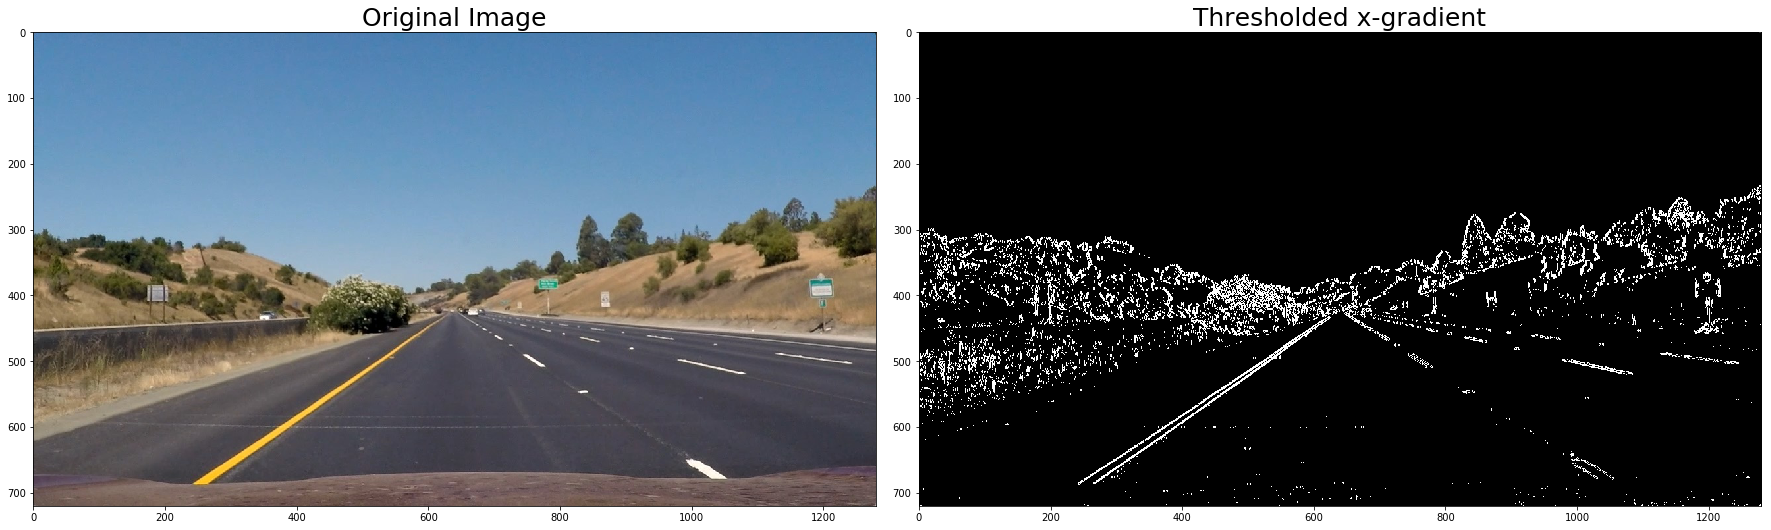

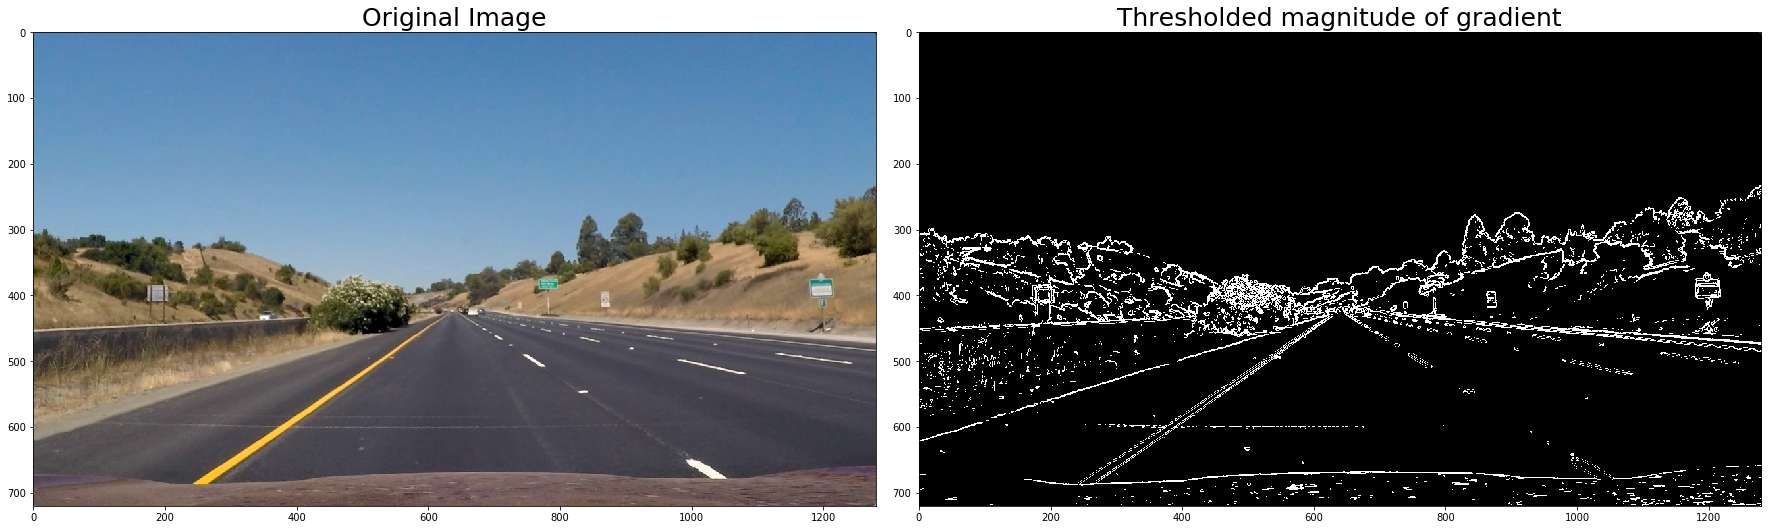

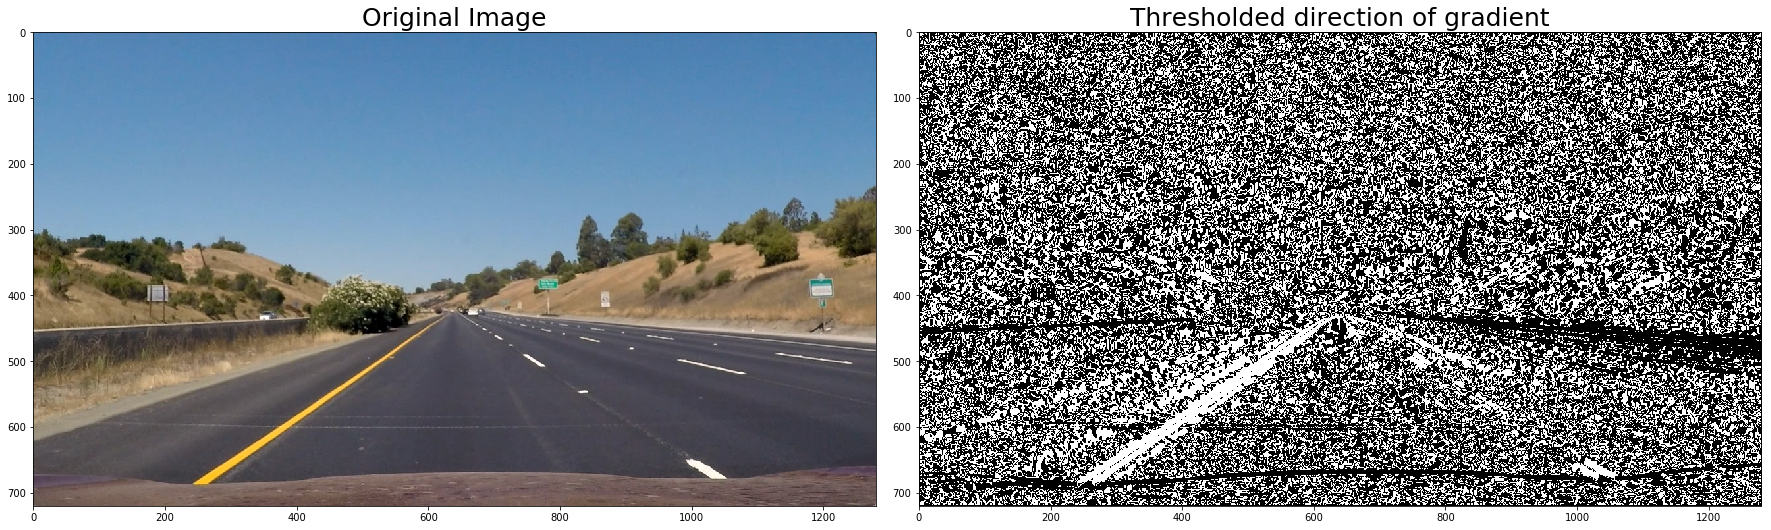

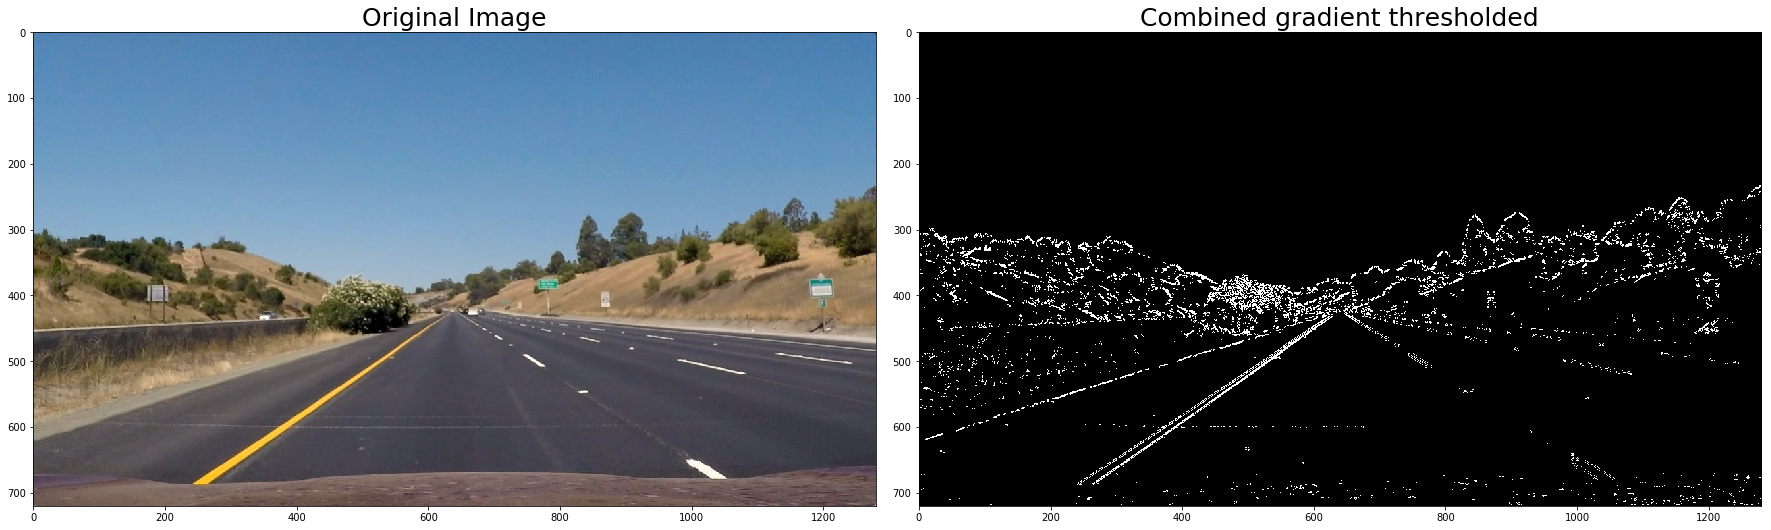

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

%matplotlib inline


### Gradient thresholding ###

# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh_x_or_y(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel_x_or_y = cv2.Sobel(gray, cv2.CV_64F, 
                             int(orient=='x'), int(orient=='y'))
    
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel_x_or_y = np.absolute(sobel_x_or_y)
    
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    abs_sobel_x_or_y = np.uint8(255*abs_sobel_x_or_y/np.max(abs_sobel_x_or_y))
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    binary_output = np.zeros_like(abs_sobel_x_or_y) 
    binary_output[(abs_sobel_x_or_y>=thresh_min)&(abs_sobel_x_or_y<=thresh_max)] = 1
            
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)
    
# Define a function that applies Sobel x and y, 
# then computes the magnitude of the gradient
# and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Calculate the magnitude 
    mag_sobel = np.sqrt(sobel_x**2+sobel_y**2)
    
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scaled_sobel = np.uint8(255*mag_sobel/np.max(mag_sobel))
    
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel) 
    binary_output[(scaled_sobel>=mag_thresh[0])&(scaled_sobel<=mag_thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    abs_sobel_x = np.absolute(sobel_x)
    abs_sobel_y = np.absolute(sobel_y)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    direction_of_gradient = np.arctan2(abs_sobel_y, abs_sobel_x)
    
    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(abs_sobel_x) 
    binary_output[(direction_of_gradient>=thresh[0])&(direction_of_gradient<=thresh[1])] = 1
    
    # 6) Return this mask as your binary_output image
    return binary_output.astype(bool)
    
def binarize_frame(image):
    
    # Gradient thresholding
    ## Thresholding on x- or y-gradients
    grad_x_binary = abs_sobel_thresh_x_or_y(image, orient='x', thresh_min=20, thresh_max=100)
    grad_y_binary = abs_sobel_thresh_x_or_y(image, orient='y', thresh_min=20, thresh_max=100)

    ## Thresholding on magnitude of gradient
    mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

    ## Thresholding on direction of gradient
    dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

    ## Combine different gradient thresholding strategies
    combined = np.zeros_like(mag_binary)
    combined[((grad_x_binary==1) & (grad_y_binary==1)) | ((mag_binary==1) & (dir_binary==1))] = 1

    ## Color thresholding
    hls_binary = hls_select(image, thresh=(90, 255))

    # Combine the threshold and gradient thresholding
    combined_binary = np.zeros_like(grad_x_binary)
    combined_binary[(grad_x_binary == 1) | (hls_binary == 1)] = 1    

    return combined_binary

    
# Read in an image
image = cv2.cvtColor(cv2.imread('./test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)

## Thresholding on x- or y-gradients
grad_x_binary = abs_sobel_thresh_x_or_y(image, orient='x', thresh_min=20, thresh_max=100)
grad_y_binary = abs_sobel_thresh_x_or_y(image, orient='y', thresh_min=20, thresh_max=100)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(grad_x_binary, cmap='gray')
ax2.set_title('Thresholded x-gradient', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Thresholding on magnitude of gradient
mag_binary = mag_thresh(image, sobel_kernel=3, mag_thresh=(30, 100))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(mag_binary, cmap='gray')
ax2.set_title('Thresholded magnitude of gradient', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Thresholding on direction of gradient
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded direction of gradient', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


## Combine different thresholding strategies
combined_gradient_binary = np.zeros_like(mag_binary)
combined_gradient_binary[((grad_x_binary==1) & (grad_y_binary==1)) | ((mag_binary==1) & (dir_binary==1))] = 1
# combined_gradient_binary[((grad_x_binary==1) & (grad_y_binary==1)) | (mag_binary==1)] = 1
# combined_gradient_binary[(grad_x_binary==1) | (mag_binary==1)] = 1

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(combined_gradient_binary, cmap='gray')
ax2.set_title('Combined gradient thresholded', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

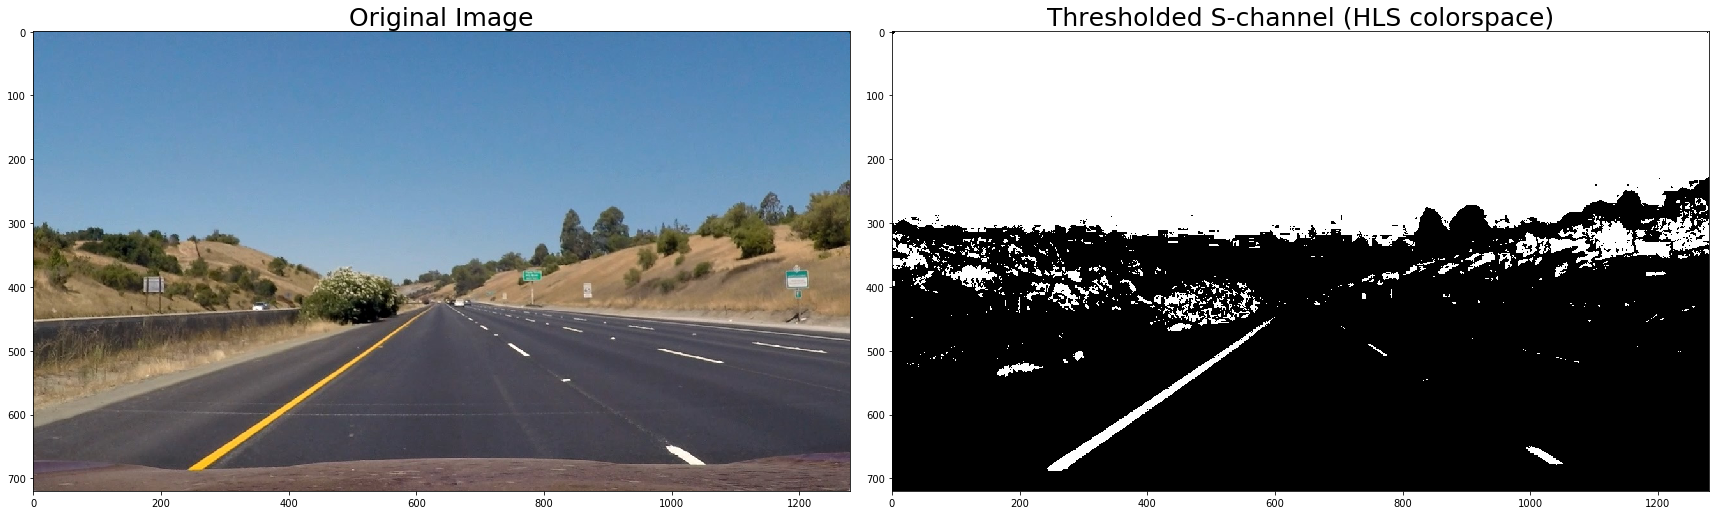

In [18]:
### Color thresholding ###

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    
    # 2) Apply a threshold to the S channel
    s_channel = img_hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel>thresh[0]) & (s_channel<=thresh[1])] = 1
    
    # 3) Return a binary image of threshold result
    #binary_output = np.copy(img) # placeholder line
    return binary_output


# Read in an image
image = cv2.cvtColor(cv2.imread('./test_images/straight_lines1.jpg'), cv2.COLOR_BGR2RGB)

## Color thresholding
hls_binary = hls_select(image, thresh=(90, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=25)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S-channel (HLS colorspace)', fontsize=25)

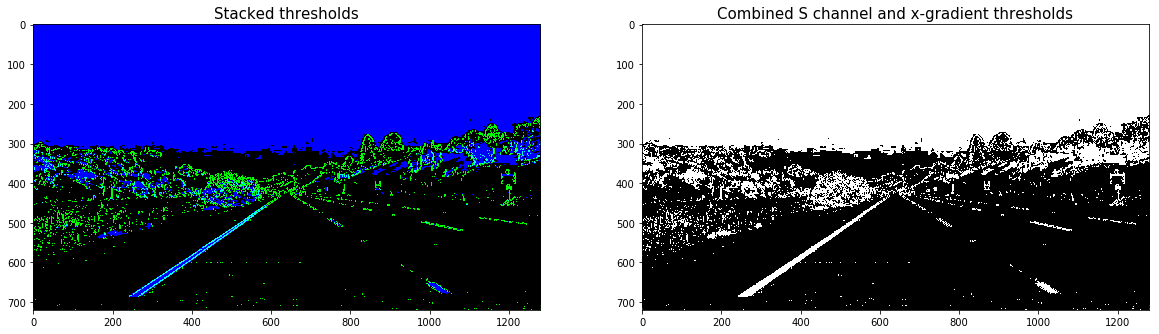

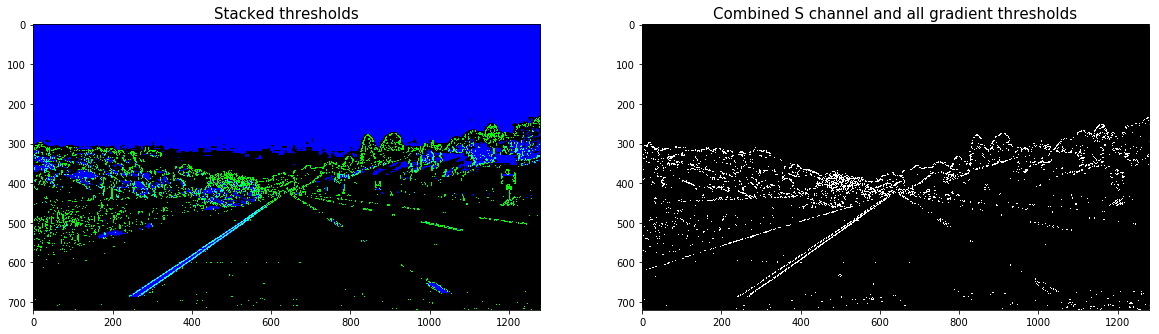

In [22]:
### Combined Color and Gradient thresholding ###

# Stack each channel to view their individual contributions in green and blue respectively
# This returns a stack of the two binary images, whose components you can see as different colors
color_binary = np.dstack(( np.zeros_like(grad_x_binary), grad_x_binary, hls_binary)) * 255

# Combine the two binary thresholds
combined_binary = np.zeros_like(grad_x_binary)
combined_binary[(grad_x_binary == 1) | (hls_binary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds', fontsize=18)
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and x-gradient thresholds', fontsize=18)
ax2.imshow(combined_binary, cmap='gray')


# Combine the two binary thresholds
combined_binary = np.zeros_like(grad_x_binary)
combined_binary[(combined_gradient_binary == 1) | (hls_binary == 1)] = 1

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Stacked thresholds', fontsize=18)
ax1.imshow(color_binary)

ax2.set_title('Combined S channel and all gradient thresholds', fontsize=18)
ax2.imshow(combined_gradient_binary, cmap='gray')